+ Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
+ Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее
+ Методом nesterov momentum
+ Методом rmsprop
+ Задание со звездочкой - доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузим датасет

In [2]:
iris = datasets.load_iris()

In [3]:
data=pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Оставим два последних класса.

In [5]:
data=data[data['target']!=0]
data['target'].replace({1.:0,2.:1},inplace=True)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0.0
51,6.4,3.2,4.5,1.5,0.0
52,6.9,3.1,4.9,1.5,0.0
53,5.5,2.3,4.0,1.3,0.0
54,6.5,2.8,4.6,1.5,0.0


In [6]:
data['target'].value_counts()

1.0    50
0.0    50
Name: target, dtype: int64

In [7]:
X=data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y=data['target'].to_numpy()
X_ = np.c_[np.ones(shape=(X.shape[0],1)),X]

### Логистическая регрессия

1) Градиентный спуск

In [8]:
def gradient_descent_lr(alpha, X, cl, numIterations):
    """
    Функция реализует алгоритм градиентного спуска логистической регрессии
    """
    m = X.shape[0] # 100
    theta = np.random.random(X.shape[1])/20    # (5,)
    cost=np.ones(numIterations)
    for iter in range(0, numIterations):
        yhat = 1 / (1 + np.exp(-np.dot(X,theta)))    # (100,)
        loss = - (cl*np.log(yhat) + (1-cl)*np.log(1-yhat))
        J = 1/m * sum(loss)  # функция cost
        # print( "iter %s | J: %.3f" % (iter, J) )
        dJ = np.dot(X.transpose(),(yhat-cl))         
        theta = theta - alpha * dJ  # update
        cost[iter]=J
    plt.plot(cost)
    plt.show()
    return theta

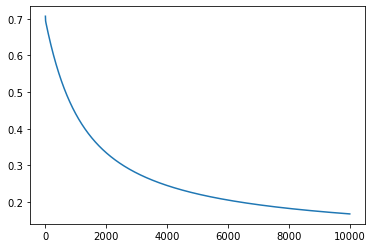

CPU times: user 569 ms, sys: 7.39 ms, total: 577 ms
Wall time: 582 ms


In [9]:
%%time
theta_ = gradient_descent_lr(0.0001, X_,Y, 10000)

In [10]:
yhat_ = 1 / (1 + np.exp(-np.dot(X_,theta_)))
ypred_ = np.where(yhat_<0.5,0,1)

In [11]:
accuracy_score(Y,ypred_)

0.97

2) Момент Нестерова

In [12]:
def nesterov_lr(alpha, gamma, X, cl, numIterations):
    """
    Функция реализует алгоритм момента Нестерова логистической регрессии
    """
    m = X.shape[0] # 100
    theta = np.random.random(X.shape[1])/20    # (5,)
    theta_zero = theta    # (3,)
    cost=np.ones(numIterations)
    v_t = np.random.random(X.shape[1])/20
    
    for iter in range(0, numIterations):
        theta_one = theta - gamma*v_t
        yhat = 1 / (1 + np.exp(-np.dot(X,theta_one)))    # (100,)
        loss = - (cl*np.log(yhat) + (1-cl)*np.log(1-yhat))
        J = 1/m * sum(loss)  # функция cost
        dJ = np.dot(X.transpose(),(yhat-cl))  # delta J 
        v_t = gamma * v_t + alpha * dJ
        theta = theta - v_t  # update
        theta_zero = theta
        cost[iter]=J
    
    plt.plot(cost)
    plt.show()
    return theta

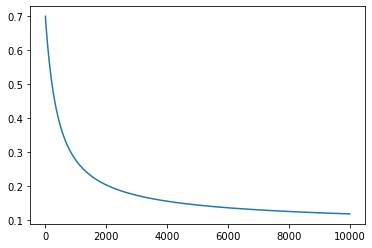

CPU times: user 762 ms, sys: 19.8 ms, total: 782 ms
Wall time: 813 ms


In [13]:
%%time
theta_n = nesterov_lr(0.0003,0.02, X_,Y, 10000)

In [14]:
yhat_n = 1 / (1 + np.exp(-np.dot(X_,theta_n)))
ypred_n = np.where(yhat_n<0.5,0,1)

In [15]:
accuracy_score(Y,ypred_n)

0.97

3) RMSProp

In [16]:
def rmsprop_lr(alpha, gamma, epsilon, X, cl, numIterations):
    """
    Функция реализует алгоритм момента Нестерова логистической регрессии
    """
    m = X.shape[0] # 100
    theta = np.random.random(X.shape[1])/20    # (5,)
    cost=np.ones(numIterations)
    E_g_sq = np.random.random(X.shape[1])/20   # (5,)
    
    for iter in range(0, numIterations):
        yhat = 1 / (1 + np.exp(-np.dot(X,theta)))    # (100,)
        loss = - (cl*np.log(yhat) + (1-cl)*np.log(1-yhat)) # (100,)
        J = 1/m * sum(loss)  # функция cost 
        dJ = np.dot(X.transpose(),(yhat-cl))  # delta J 
        g_rms = dJ / np.sqrt(E_g_sq + epsilon)
        theta = theta - alpha * g_rms  # update
        theta_zero = theta
        cost[iter]=J
        E_g_sq = gamma * E_g_sq + (1 - gamma) * (dJ ** 2)
    
    plt.plot(cost)
    plt.show()
    return theta

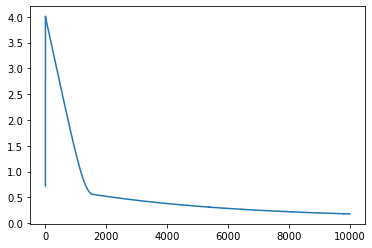

CPU times: user 763 ms, sys: 17 ms, total: 780 ms
Wall time: 815 ms


In [17]:
%%time
theta_r = rmsprop_lr(0.0003,0.02,0.0000001, X_,Y, 10000)

In [18]:
yhat_r = 1 / (1 + np.exp(-np.dot(X_,theta_r)))
ypred_r = np.where(yhat_n<0.5,0,1)

In [19]:
accuracy_score(Y,ypred_r)

0.97

### Линейный классификатор с градиентным спуском

In [20]:
def gradient_descent_lc(alpha, X, cl, numIterations):
    """
    Функция реализует алгоритм градиентного спуска линейного классификатора
    """
    m = X.shape[0] # 100
    theta = np.random.random(X.shape[1])/20    # (5,)
    cost=np.ones(numIterations)
    for iter in range(0, numIterations):
        yhat = np.sign(np.dot(X,theta))
        loss = - (cl*np.log(yhat) + (1-cl)*np.log(1-yhat))
        J = 1/m * sum(loss)  # функция cost
        dJ = np.sign(np.dot(X,theta))         
        theta = theta - alpha * dJ  # update
        cost[iter]=J
    plt.plot(cost)
    plt.show()
    return theta